In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
!apt-get -qq install fonts-nanum
import matplotlib.font_manager as fm
plt.rc('font', family='NanumGothic')
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)
import logging
import matplotlib
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [23]:
df = pd.read_csv('/content/example_data.csv', encoding='utf-8')

#문제 1, 2, 3, 4, 5, 6, 7, 9

In [53]:
# 문제 1
df = pd.read_csv('/content/example_data.csv', encoding='utf-8')
print('문제1 :데이터프레임')
print(df)

문제1 :데이터프레임
    학번    이름   학년   점수 분반  공부시간
0    1  신사임당  NaN   69  B     4
1    2   홍길동  1.0   92  B     3
2    3   강감찬  4.0   91  C    20
3    4   강감찬  2.0   70  C     5
4    5   강감찬  3.0   83  C     5
5    6   이순신  4.0   95  A     0
6    7   강감찬  4.0   71  C     1
7    8   김유신  NaN   88  B     5
8    9  신사임당  3.0   94  A     9
9   10   홍길동  NaN   60  B     3
10  11   NaN  1.0  200  C     0
11  12  신사임당  2.0   96  A    20
12  13   김유신  4.0   65  A     0
13  14   NaN  2.0   98  C     1
14  15   홍길동  4.0   77  A     2
15  16   이순신  4.0   75  A     4
16  17   NaN  3.0   64  A     2
17  18   홍길동  4.0   91  A     0
18  19   이순신  1.0  200  A     3
19  20  신사임당  2.0   61  A     2
20  20  신사임당  2.0   61  A     2


In [54]:
# 문제 2
print('문제2 :데이터프레임 정보 요약')
print(df.info())

문제2 :데이터프레임 정보 요약
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학번      21 non-null     int64  
 1   이름      18 non-null     object 
 2   학년      18 non-null     float64
 3   점수      21 non-null     int64  
 4   분반      21 non-null     object 
 5   공부시간    21 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.1+ KB
None


In [55]:
# 문제 3
print('3번: 숫자형 데이터 기술 통계량')
print(df.describe())

3번: 숫자형 데이터 기술 통계량
              학번         학년          점수       공부시간
count  21.000000  18.000000   21.000000  21.000000
mean   10.952381   2.777778   90.523810   4.333333
std     6.127611   1.165966   38.647922   5.650959
min     1.000000   1.000000   60.000000   0.000000
25%     6.000000   2.000000   69.000000   1.000000
50%    11.000000   3.000000   83.000000   3.000000
75%    16.000000   4.000000   94.000000   5.000000
max    20.000000   4.000000  200.000000  20.000000


In [56]:
# 문제 4
print('문제4: 각 열의 결측치 확인')
print(df.isnull().sum())

문제4: 각 열의 결측치 확인
학번      0
이름      3
학년      3
점수      0
분반      0
공부시간    0
dtype: int64


In [57]:
# 문제 5
df_outl = df[(df['점수']>100) | (df['공부시간']>10)]
n = len(df_outl)

print('문제5: 이상치 확인 (조건식)\n')
print(f'이상치 개수: {n}\n')
print('이상치 데이터:')
print(df_outl)

문제5: 이상치 확인 (조건식)

이상치 개수: 4

이상치 데이터:
    학번    이름   학년   점수 분반  공부시간
2    3   강감찬  4.0   91  C    20
10  11   NaN  1.0  200  C     0
11  12  신사임당  2.0   96  A    20
18  19   이순신  1.0  200  A     3


In [58]:
# 문제 6
df_dupl = df[df.duplicated(keep = False)] #중복된 거 모두 포함
n = len(df_dupl)

print('문제 6: 완전 중복 행 확인')
print('중복 제거 전 데이터프레임 크기:', df.shape)
print(f'완전 중복 행 개수: {n}')
print(df_dupl)

문제 6: 완전 중복 행 확인
중복 제거 전 데이터프레임 크기: (21, 6)
완전 중복 행 개수: 2
    학번    이름   학년  점수 분반  공부시간
19  20  신사임당  2.0  61  A     2
20  20  신사임당  2.0  61  A     2


In [59]:
# 문제 7
df_clean = df.drop_duplicates()
n = len(df) - len(df_clean)

print('문제7: 완전 중복 제거')
print('중복 제거 후 데이터프레임 크기:', df_clean.shape)
print(f'제거된 행 수: {n}')
print(df_clean)

문제7: 완전 중복 제거
중복 제거 후 데이터프레임 크기: (20, 6)
제거된 행 수: 1
    학번    이름   학년   점수 분반  공부시간
0    1  신사임당  NaN   69  B     4
1    2   홍길동  1.0   92  B     3
2    3   강감찬  4.0   91  C    20
3    4   강감찬  2.0   70  C     5
4    5   강감찬  3.0   83  C     5
5    6   이순신  4.0   95  A     0
6    7   강감찬  4.0   71  C     1
7    8   김유신  NaN   88  B     5
8    9  신사임당  3.0   94  A     9
9   10   홍길동  NaN   60  B     3
10  11   NaN  1.0  200  C     0
11  12  신사임당  2.0   96  A    20
12  13   김유신  4.0   65  A     0
13  14   NaN  2.0   98  C     1
14  15   홍길동  4.0   77  A     2
15  16   이순신  4.0   75  A     4
16  17   NaN  3.0   64  A     2
17  18   홍길동  4.0   91  A     0
18  19   이순신  1.0  200  A     3
19  20  신사임당  2.0   61  A     2


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

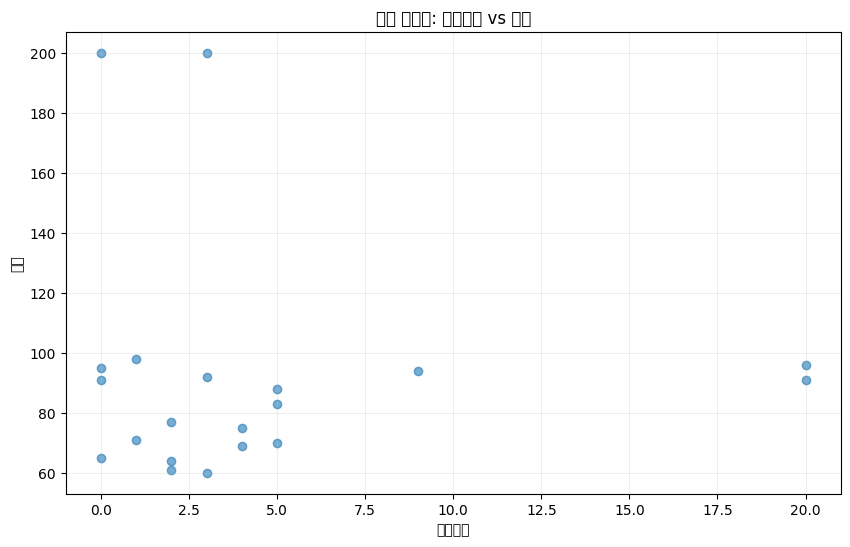

In [60]:
# 문제 9
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') #한글 폰트
plt.figure(figsize=(10,6))
plt.scatter(df_clean['공부시간'], df_clean['점수'], alpha=0.6)
plt.title('원본 데이터: 공부시간 vs 점수')
plt.xlabel('공부시간')
plt.ylabel('점수')
plt.grid(True, alpha=0.2)
plt.show()

#문제 10

In [26]:
# 문제 10
Q1_s = df['점수'].quantile(0.25)
Q3_s = df['점수'].quantile(0.75)
IQR_s = Q3_s - Q1_s

LB_s = Q1_s - 1.5 * IQR_s
UB_s = Q3_s + 1.5 * IQR_s

OTL_s = df[(df['점수'] < LB_s) | (df['점수'] > UB_s)]

print('점수 이상치:')
print(OTL_s)

점수 이상치:
    학번   이름   학년   점수 분반  공부시간
10  11  NaN  1.0  200  C     0
18  19  이순신  1.0  200  A     3


In [27]:
Q1_t = df['공부시간'].quantile(0.25)
Q3_t = df['공부시간'].quantile(0.75)
IQR_t = Q3_t - Q1_t

LB_t = Q1_t - 1.5 * IQR_t
UB_t = Q3_t + 1.5 * IQR_t

OTL_t = df[(df['공부시간'] < LB_t) | (df['공부시간'] > UB_t)]

print('공부시간 이상치:')
print(OTL_t)

공부시간 이상치:
    학번    이름   학년  점수 분반  공부시간
2    3   강감찬  4.0  91  C    20
11  12  신사임당  2.0  96  A    20


In [32]:
df_OTLx = df[
    (df['점수'] > LB_s) &
    (df['점수'] < UB_s) &
    (df['공부시간'] > LB_t) &
    (df['공부시간'] < UB_t)
]

print('이상치가 제거된 데이터프레임:')
print(df_OTLx)

이상치가 제거된 데이터프레임:
    학번    이름   학년  점수 분반  공부시간
0    1  신사임당  NaN  69  B     4
1    2   홍길동  1.0  92  B     3
3    4   강감찬  2.0  70  C     5
4    5   강감찬  3.0  83  C     5
5    6   이순신  4.0  95  A     0
6    7   강감찬  4.0  71  C     1
7    8   김유신  NaN  88  B     5
8    9  신사임당  3.0  94  A     9
9   10   홍길동  NaN  60  B     3
12  13   김유신  4.0  65  A     0
13  14   NaN  2.0  98  C     1
14  15   홍길동  4.0  77  A     2
15  16   이순신  4.0  75  A     4
16  17   NaN  3.0  64  A     2
17  18   홍길동  4.0  91  A     0
19  20  신사임당  2.0  61  A     2
20  20  신사임당  2.0  61  A     2


# 문제 11

In [33]:
print('문제 11. 분반별 점수 평균')

class_m = df_OTLx.groupby('분반')['점수'].mean()

print(class_m.round(2))

문제 11. 분반별 점수 평균
분반
A    75.89
B    77.25
C    80.50
Name: 점수, dtype: float64


#문제 12

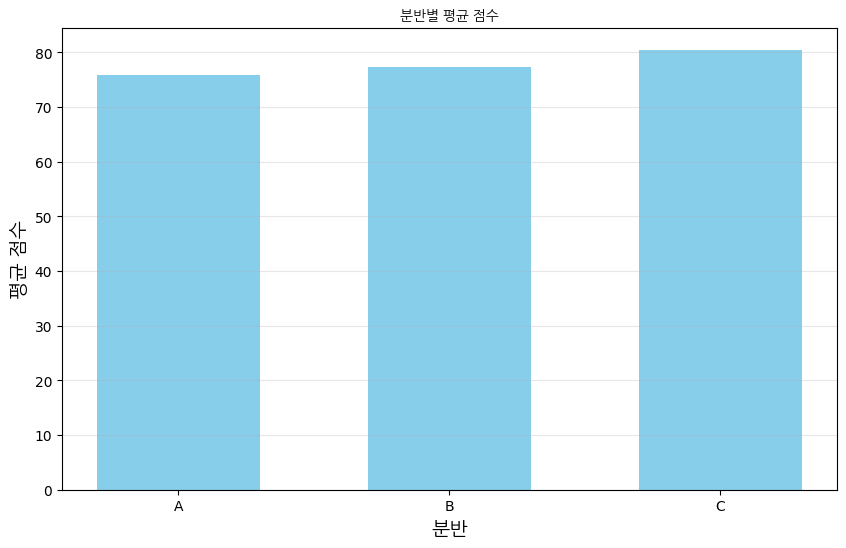

In [50]:
plt.figure(figsize=(10, 6))
plt.rc('font', family='NanumBarunGothic')
plt.bar(class_m.index, class_m.values, color='skyblue', width=0.6)
plt.title('분반별 평균 점수', fontsize=16, fontproperties=font_prop)
plt.xlabel('분반', fontsize=14, fontproperties=font_prop)
plt.ylabel('평균 점수', fontsize=14, fontproperties=font_prop)
plt.grid(axis='y', alpha=0.3)
plt.show()

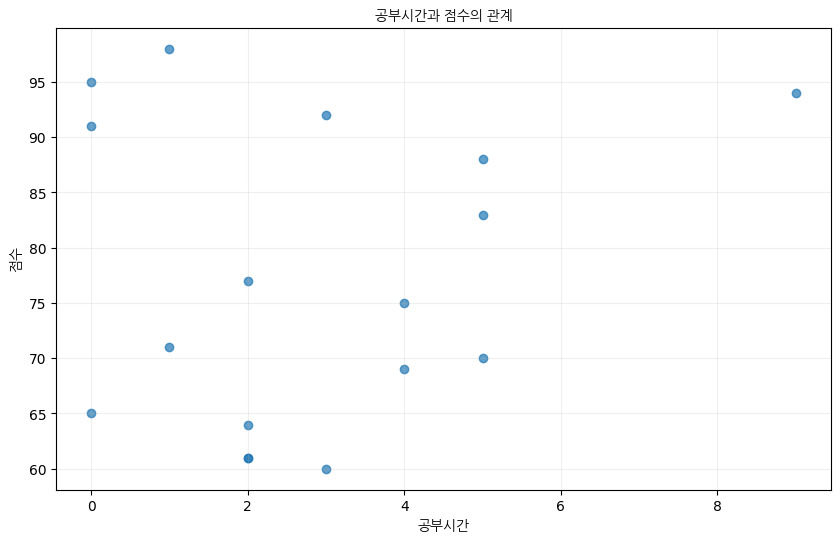

In [52]:
plt.figure(figsize=(10,6))
plt.scatter(df_OTLx['공부시간'], df_OTLx['점수'], alpha=0.7)
plt.title('공부시간과 점수의 관계', fontproperties=font_prop)
plt.xlabel('공부시간', fontproperties=font_prop)
plt.ylabel('점수', fontproperties=font_prop)
plt.grid(True, alpha=0.2)
plt.show()